# Boosting

## Carga de datasets

In [1]:
library(caret)
library(dplyr)
library(caretEnsemble)
library(mlbench)

digit_train <- read.csv("./train.csv")
digit_test <- read.csv("./test.csv")

digit_train$label <- as.factor(digit_train$label)

Loading required package: ggplot2



Loading required package: lattice


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘caretEnsemble’


The following object is masked from ‘package:ggplot2’:

    autoplot




In [2]:
train_perc <- 0.75
train_index <- createDataPartition(digit_train$label,
                                   p = train_perc,
                                   list = FALSE)

data_train <- digit_train[train_index, ]
data_test <- digit_train[-train_index, ]

## Visualizamos el dataset

In [3]:
View(x = data_train)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,⋯,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,7,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
9,5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
10,3,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
11,8,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
12,9,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


## Entrenamiento

In [4]:
control <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(Sys.time())
metric <- "Accuracy"

### C5.0

In [5]:
grid <- expand.grid(trials = c(1, 10, 20),
                    model = c("tree", "rules"),
                    winnow = c(TRUE, FALSE))
if (file.exists("boosting_c50.rds")) {
  model_c50 <- readRDS(file = "boosting_c50.rds")
} else {
  model_c50 <- train(label ~ .,
                     data = data_train[1:1000, ],
                     method = "C5.0",
                     metric = metric,
                     tuneGrid = grid,
                     trControl = control)
  saveRDS(model_c50, file = "boosting_c50.rds")
}

### AdaBoost.M1

In [6]:
grid <- expand.grid(mfinal = (1:3) * 3,
                    maxdepth = c(1, 3),
                    coeflearn = c("Breiman"))
if (file.exists("boosting_adaboost.rds")) {
  model_adaboost <- readRDS(file = "boosting_adaboost.rds")
} else {
  model_adaboost <- train(label ~ .,
                          data = data_train[1:1000, ],
                          method = "AdaBoost.M1",
                          metric = metric,
                          tuneGrid = grid,
                          trControl = control)
  saveRDS(model_adaboost, file = "boosting_adaboost.rds")
}

### Boosted Linear Model

In [7]:
grid <- expand.grid(mstop = 150,
                    nu = 0.01)
if (file.exists("boosting_bstlm.rds")) {
  model_bstlm <- readRDS(file = "boosting_bstlm.rds")
} else {
  model_bstlm <- train(label ~ .,
                       data = data_train,
                       method = "BstLm",
                       metric = metric,
                       tuneGrid = grid,
                       trControl = control)
  saveRDS(model_bstlm, file = "boosting_bstlm.rds")
}

## Resultados


Call:
summary.resamples(object = results)

Models: c50, adaboost, bstlm 
Number of resamples: 30 

Accuracy 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
c50      0.8181818 0.8488636 0.8700000 0.8706472 0.8894388 0.9405941    0
adaboost 0.4242424 0.4665099 0.4923727 0.5064150 0.5639706 0.6020408    0
bstlm    0.1113579 0.1114020 0.1114286 0.1115132 0.1117106 0.1117815    0

Kappa 
              Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
c50      0.7974540 0.8320068 0.8552983 0.8560703 0.8769935 0.9339077    0
adaboost 0.3572893 0.4049895 0.4338301 0.4496123 0.5133672 0.5563552    0
bstlm    0.0000000 0.0000000 0.0000000 0.0000000 0.0000000 0.0000000    0


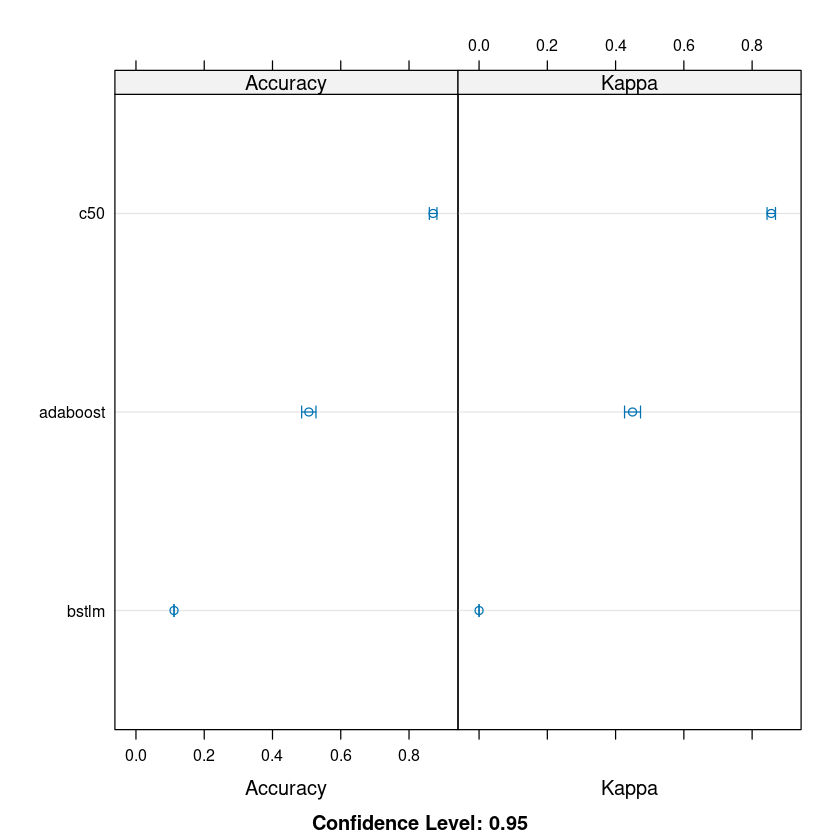

In [10]:
results <- resamples(list(c50 = model_c50,
                          adaboost = model_adaboost,
                          bstlm = model_bstlm))
summary(results)
dotplot(results)

## Test

### C5.0

In [26]:
pred_c50 <- predict(model_c50, data_test[1:1000, ])
conf_matrix_c50 <- table(data_test[1:1000, ]$label, pred_c50)

In [24]:
conf_matrix_c50
accuracy_c50 <- mean(pred_c50 == data_test[1:1000, ]$label)
cat("Accuracy with C5.0 boosting: ", accuracy_c50)

   pred_c50
      0   1   2   3   4   5   6   7   8   9
  0 105   0   2   0   0   2   1   1   1   0
  1   0  86   1   0   0   1   0   1   3   0
  2   1   1 104   1   1   0   4   3   0   1
  3   2   1   5  78   0  10   1   0   2   3
  4   0   0   1   0  89   0   1   1   1   8
  5   0   0   0   3   3  64   3   0   1   9
  6   3   0   0   0   1   0 100   1   2   0
  7   1   0   2   0   0   0   0  88   3   5
  8   1   2   1   3   1   4   0   2  77   2
  9   1   0   0   1   7   2   0   3   0  81

Accuracy with C5.0 boosting:  0.872

### AdaBoost.M1

In [ ]:
pred_adaboost <- predict(model_adaboost, data_test[1:1000, ])
conf_matrix_adaboost <- table(data_test[1:1000, ]$label, pred_adaboost)

In [27]:
conf_matrix_adaboost
accuracy_adaboost <- mean(pred_adaboost == data_test[1:1000, ]$label)
cat("Accuracy with AdaBoost.M1 boosting: ", accuracy_adaboost)

   pred_adaboost
     0  1  2  3  4  5  6  7  8  9
  0 90  0  0  0  1  8  0  2  9  2
  1  0 64 25  0  0  0  0  1  1  1
  2  2  5 76  0  2 11  0  8  7  5
  3  4  8  3  0  1 63  0  9  3 11
  4  0  1  1  0 61  1  0 10  7 20
  5  2  4  0  0  2 46  0  5  9 15
  6  6  1  3  0 25  7  0 11 22 32
  7  7  5  5  0  7  4  0 59  1 11
  8  1 11 11  0  2  5  0 10 49  4
  9  1  3  0  0  5  2  0 12  1 71

Accuracy with AdaBoost.M1 boosting:  0.516

### Boosted Linear Model

In [ ]:
pred_bstlm <- predict(model_bstlm, data_test)
conf_matrix_bstlm <- table(data_test$label, pred_bstlm)

In [28]:
conf_matrix_bstlm
accuracy_bstlm <- mean(pred_bstlm == data_test$label)
cat("Accuracy with Boosted Linear Model boosting: ", accuracy_bstlm)

   pred_bstlm
       0    1    2    3    4    5    6    7    8    9
  0    0 1033    0    0    0    0    0    0    0    0
  1    0 1171    0    0    0    0    0    0    0    0
  2    0 1044    0    0    0    0    0    0    0    0
  3    0 1087    0    0    0    0    0    0    0    0
  4    0 1018    0    0    0    0    0    0    0    0
  5    0  948    0    0    0    0    0    0    0    0
  6    0 1034    0    0    0    0    0    0    0    0
  7    0 1100    0    0    0    0    0    0    0    0
  8    0 1015    0    0    0    0    0    0    0    0
  9    0 1047    0    0    0    0    0    0    0    0

Accuracy with Boosted Linear Model boosting:  0.1115557

## Conclusión final

De las tres posibilidades de boosting, el método C5.0 es el que más precisión reporta (0.872)